<a href="https://colab.research.google.com/github/firqinse0308/portofolio1/blob/main/HW_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ramen Rating Visualization Data

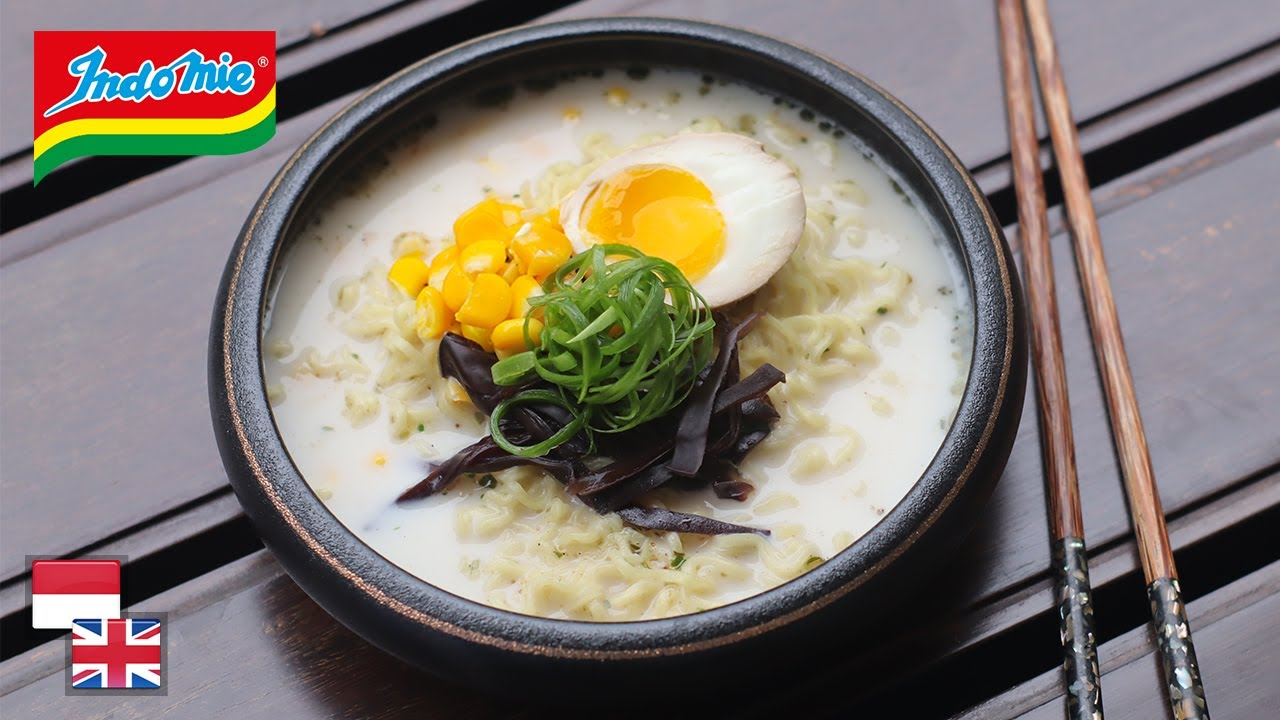

This dataset is republished as-is from the original BIG LIST on https://www.theramenrater.com/.

Each row has 7 columns:

Review: The Unique Number of Review of each ramen

Brand: The brand of the ramen manufacturer

Variety: The specific name of the ramen

Style: Packaging of the ramen

Country: Country of origin

Stars: The rating of the ramen, as provided by theramenrater.

Top Ten : Top Ten for each year

Note that this dataset does not include the text of the reviews themselves. For that, you should browse through https://www.theramenrater.com/ instead!

SOME QUESTIONS TO ANSWER WITH DATA VISUALIZATION:
What The most country in the Top ten ramens?
What The most Brand in the Top ten ramens?
What The most Style in the Top ten ramens?
Which brands are the most successful?
Which style has the best ratings?

# Import Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import re
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

import tensorflow as tf


# Connect to Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Data

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ramen-ratings.csv')

# Initial EDA

In [5]:
# Display the first 5 rows
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [6]:
# Display the last 5 rows
df.tail()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1965,"\n44,Indomie,Special Chicken,Pack,Indonesia,4....",NaN,NaN,NaN,NaN,NaN,NaN
1966,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
1967,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
1968,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN
1969,1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN


In [7]:
# Display 5 random rows
df.sample(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
144,2436,Kang Shi Fu,Artificial Dongpo's Braised Pork Flavour,Pack,Hong Kong,4.75,NaN
858,1722,CarJEN,Otentiq Cheezy Curry Instant Noodles,Pack,Malaysia,4.5,NaN
793,1787,Pama,Kua Teaw Segera,Pack,Malaysia,4,NaN
737,1843,Forest Noodles,Sunbaked Noodles With Sesame Sauce,Pack,Taiwan,4.5,NaN
572,2008,Sichuan Baijia,Hot spicy Flavor Instant Vermicelli,Bowl,China,3.5,NaN


In [8]:
# Get the dataframe's info 
# (number of rows, column name & type, number of missing rows per column, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  1970 non-null   object
 1   Brand     1956 non-null   object
 2   Variety   1956 non-null   object
 3   Style     1955 non-null   object
 4   Country   1956 non-null   object
 5   Stars     1956 non-null   object
 6   Top Ten   30 non-null     object
dtypes: object(7)
memory usage: 107.9+ KB


In [9]:
# Get the unique values of dataframe's info 
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("="*70)

Column: Review #
['2580' '2579' '2578' ... '3' '2' '1']
Column: Brand
['New Touch' 'Just Way' 'Nissin' 'Wei Lih' "Ching's Secret"
 'Samyang Foods' 'Acecook' 'Ikeda Shoku' "Ripe'n'Dry" 'KOKA' 'Tao Kae Noi'
 'Yamachan' 'Nongshim' 'TRDP' 'Binh Tay' 'Paldo' 'Jackpot Teriyaki'
 'Yum-Mie' 'MyKuali' 'Ottogi' 'Sichuan Guangyou' 'Lipton' 'Lele'
 'Fujiwara' 'Uni-President' 'Maruchan' 'Prima' 'Sokensha' 'Takamori'
 'Guava Story' 'Samurai Ramen' 'Ogasawara' 'Pringles' "Mom's Dry Noodle"
 'Maggi' 'Indomie' 'Happy Cook' 'The Ramen Rater Select' 'TTL' 'E-Zee'
 'Kiki Noodle' 'Tokyo Noodle' 'GGE' 'Myojo' 'Sau Tao' 'Wang' 'Daifuku'
 'Master Kong' "World O' Noodle" 'Kang Shi Fu' 'Mum Ngon' 'Fashion Food'
 'Dream Kitchen' 'Ajinatori' "Dr. McDougall's" 'Ve Wong' 'Super Bihun'
 'Xiuhe' 'Little Cook' 'Shirakiku' "Mama Pat's" 'Goku-Uma'
 'Sichuan Baijia' 'Liang Cheng Mai' 'Gefen' 'Hua Feng' 'Pulmuone'
 'Liu Quan' 'Daikoku' 'Chuan Wei Wang' 'Wai Wai' 'Kamfen' 'Marutai'
 'Vifon' nan '1 To 3 Noodles' 'Fantastic'

# Find The Missing Value

In [10]:
df.isnull().sum()

Review #       0
Brand         14
Variety       14
Style         15
Country       14
Stars         14
Top Ten     1940
dtype: int64

Text(0.5, 1.0, 'Ratio of missing values per columns')

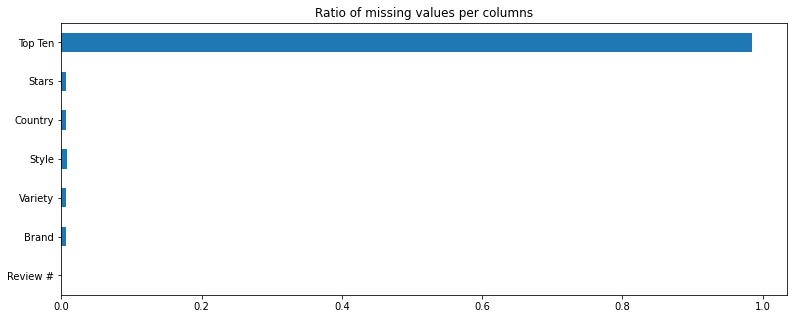

In [11]:
# Missing Value Chart
plt.figure(figsize=(13, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [12]:
df[(df.Brand.isna())].head(3)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
227,"2353,Nissin,""Cup Noodles Rich Garlic, Egg Yolk...",NaN,NaN,NaN,NaN,NaN,NaN
241,"2339,Nissin,""Cup Noodles Sopa Nissin Sabor Cam...",NaN,NaN,NaN,NaN,NaN,NaN
246,"2334,Nissin,""Sopa Nissin Sabor Mariscos, Haban...",NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df[(df.Style.isna())]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
227,"2353,Nissin,""Cup Noodles Rich Garlic, Egg Yolk...",NaN,NaN,NaN,NaN,NaN,NaN
241,"2339,Nissin,""Cup Noodles Sopa Nissin Sabor Cam...",NaN,NaN,NaN,NaN,NaN,NaN
246,"2334,Nissin,""Sopa Nissin Sabor Mariscos, Haban...",NaN,NaN,NaN,NaN,NaN,NaN
552,"2028,Maruchan,""Sopa Maruchan Sabor a Camaron, ...",NaN,NaN,NaN,NaN,NaN,NaN
1010,"1570,Maruchan,""Big Cup Ramen Corn, Salt & Butt...",NaN,NaN,NaN,NaN,NaN,NaN
1115,"1465,Thai Chef,""Shrimp """"Tom Yum"""" Instant Nud...",NaN,NaN,NaN,NaN,NaN,NaN
1670,"910,Paldo,Namja Ramyun,Bowl,South Korea,4.25,""",NaN,NaN,NaN,NaN,NaN,NaN
1671,"\n909,Indomie,Kriuuk Bawang,Pack,Indonesia,4.2...",NaN,NaN,NaN,NaN,NaN,NaN
1672,"\n733,Indomie,Rasa Soto Betawi,Pack,Indonesia,...",NaN,NaN,NaN,NaN,NaN,NaN
1685,"610,Wei Wei,""""""A"""" Series Artificial Chicken"",...",NaN,NaN,NaN,NaN,NaN,NaN


# Feature Review '#'

In [14]:
len(df['Review #'].value_counts())

1970

In [15]:
# this is unique value, drop 'Review #'
df=df.drop('Review #',axis=1)

In [16]:
df.head(2)

,Brand,Variety,Style,Country,Stars,Top Ten
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN


# Feature Country

In [17]:
df['Country'].value_counts()

Japan            281
USA              223
South Korea      192
Taiwan           177
Malaysia         149
Thailand         130
China            126
Hong Kong        125
Singapore        100
UK                65
Indonesia         63
Vietnam           61
Canada            34
Philippines       27
Germany           26
India             24
Australia         22
Mexico            22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Holland            4
Finland            3
Sweden             3
Sarawak            3
Estonia            2
Ghana              2
Fiji               2
United States      1
Nigeria            1
Name: Country, dtype: int64

In [18]:
df = df.replace({'Country': {'United States': "USA", 'Holland': 'Netherlands', "Sarawak": 'Malaysia'}})

In [19]:
df['Country'].value_counts()

Japan          281
USA            224
South Korea    192
Taiwan         177
Malaysia       152
Thailand       130
China          126
Hong Kong      125
Singapore      100
UK              65
Indonesia       63
Vietnam         61
Canada          34
Philippines     27
Germany         26
India           24
Mexico          22
Australia       22
Netherlands     19
Nepal           14
Myanmar         14
Pakistan         9
Hungary          9
Bangladesh       7
Colombia         6
Cambodia         5
Brazil           5
Poland           4
Finland          3
Sweden           3
Estonia          2
Ghana            2
Fiji             2
Nigeria          1
Name: Country, dtype: int64

# Feature Stars

In [20]:
# Get Unique values

df['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', nan, '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00',
       '3.3', '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125'], dtype=object)

In [21]:
# Get 'Unrated' values in 'Stars' column 
df[(df.Stars == 'Unrated')]

,Brand,Variety,Style,Country,Stars,Top Ten
32,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
122,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
993,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


In [22]:
# Because just there are 3 unrated values in df so we drop row that there is unrated values
df = df.drop(df[(df.Stars == 'Unrated')].index, axis=0)

In [23]:
# change data type column 'stars' from object to float
df["Stars"] = pd.to_numeric(df["Stars"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1969
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    1953 non-null   object 
 1   Variety  1953 non-null   object 
 2   Style    1952 non-null   object 
 3   Country  1953 non-null   object 
 4   Stars    1953 non-null   float64
 5   Top Ten  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 107.6+ KB


# Top Ramen


In [25]:
df_top_ten = df[df['Top Ten'].notnull()]

In [26]:
df_top_ten.head(3)

,Brand,Variety,Style,Country,Stars,Top Ten
616,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,2016 #10
633,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,2016 #1
655,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.0,2016 #8


In [27]:
df_top_ten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 616 to 1904
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    30 non-null     object 
 1   Variety  30 non-null     object 
 2   Style    30 non-null     object 
 3   Country  30 non-null     object 
 4   Stars    30 non-null     float64
 5   Top Ten  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.6+ KB


In [28]:
df_top_ten.isna().sum()

Brand      0
Variety    0
Style      0
Country    0
Stars      0
Top Ten    0
dtype: int64

In [ ]:
df_top_ten['Year'] = df_top_ten['Top Ten'].apply(lambda year:year.split('#')[0])

In [30]:
df_top_ten.head(2)

,Brand,Variety,Style,Country,Stars,Top Ten,Year
616,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,2016 #10,2016
633,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,2016 #1,2016


In [ ]:
df_top_ten['Rank'] = df_top_ten['Top Ten'].apply(lambda year:int(year.split('#')[1]))

In [32]:
df_top_ten.head(2)

,Brand,Variety,Style,Country,Stars,Top Ten,Year,Rank
616,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,2016 #10,2016,10
633,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,2016 #1,2016,1


In [ ]:
df_top_ten['Scores'] = df_top_ten['Rank'].apply(lambda rank: abs(11-rank))

In [34]:
df_top_ten.head(3)

,Brand,Variety,Style,Country,Stars,Top Ten,Year,Rank,Scores
616,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,2016 #10,2016,10,1
633,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,2016 #1,2016,1,10
655,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.0,2016 #8,2016,8,3


In [35]:
df_top_ten =df_top_ten.drop('Top Ten',axis=1)

In [36]:
df_top_ten['Year'].unique()

array(['2016 ', '2015 ', '2013 ', '2014 ', '2012 '], dtype=object)

In [37]:
df_top_ten_2012 = df_top_ten[(df_top_ten.Year == '2012 ')]
df_top_ten_2012


,Brand,Variety,Style,Country,Stars,Year,Rank,Scores
1687,Koka,Spicy Black Pepper,Pack,Singapore,5.00,2012,10,1
1717,Nongshim,Shin Ramyun Black,Pack,South Korea,4.75,2012,7,4
1861,Mi Sedaap,Kari Spesial,Pack,Indonesia,4.50,2012,5,6
1903,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5.00,2012,3,8
1904,Myojo,Hyoubanya No Chukasoba Oriental,Pack,Japan,4.25,2012,6,5


In [38]:
df_top_ten_2013 = df_top_ten[(df_top_ten.Year == '2013 ')]
df_top_ten_2013

,Brand,Variety,Style,Country,Stars,Year,Rank,Scores
1109,Mama,Instant Noodles Shrimp Creamy Tom Yum Flavour ...,Pack,Thailand,5.0,2013,10,1
1588,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5.0,2013,1,10
1589,Prima Taste,Singapore Curry La Mian,Pack,Singapore,5.0,2013,2,9
1646,Nongshim,Jinjja Jinjja Flamin' Hot & Nutty,Pack,USA,5.0,2013,4,7


In [39]:
df_top_ten_2014 = df_top_ten[(df_top_ten.Year == '2014 ')]
df_top_ten_2014

,Brand,Variety,Style,Country,Stars,Year,Rank,Scores
1230,Mamee,Chef Curry Laksa Flavour,Pack,Malaysia,5.0,2014,7,4
1250,Sapporo Ichiban,Otafuku Okonomi Sauce Yakisoba,Tray,Japan,5.0,2014,4,7
1272,Nongshim,Soon Veggie Noodle Soup,Pack,South Korea,5.0,2014,9,2
1278,Mama,Instant Noodles Yentafo Tom Yum Mohfai Flavour,Pack,Thailand,5.0,2014,10,1
1309,Prima Taste,Singapore Chilli Crab La Mian,Pack,Singapore,5.0,2014,8,3
1382,Samyang Foods,Maesaengyitangmyun Baked Noodle,Pack,South Korea,5.0,2014,5,6
1397,Paldo,Cheese Noodle,Pack,South Korea,5.0,2014,6,5
1493,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.0,2014,1,10


In [40]:
df_top_ten_2015 = df_top_ten[(df_top_ten.Year == '2015 ')]
df_top_ten_2015

,Brand,Variety,Style,Country,Stars,Year,Rank,Scores
942,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.0,2015,10,1
963,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.0,2015,7,4
995,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.0,2015,4,7
1059,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.0,2015,9,2
1072,Mamee,Chef Gold Recipe Mi Kari Seribu Rasa,Pack,Malaysia,5.0,2015,6,5
1080,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,Malaysia,5.0,2015,1,10
1114,Mama,Oriental Style Instant Noodles Green Curry Fla...,Pack,Thailand,5.0,2015,8,3


In [41]:
df_top_ten_2016 = df_top_ten[(df_top_ten.Year == '2016 ')]
df_top_ten_2016

,Brand,Variety,Style,Country,Stars,Year,Rank,Scores
616,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,2016,10,1
633,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,2016,1,10
655,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.0,2016,8,3
673,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.0,2016,5,6
752,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.0,2016,9,2
891,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.0,2016,7,4


In [42]:
df_top_ten.corr(method ='pearson')

,Stars,Rank,Scores
Stars,1.000000,0.027592,-0.027592
Rank,0.027592,1.000000,-1.000000
Scores,-0.027592,-1.000000,1.000000


The correlation between stars rating and rank/scores is only +- 0.027, because the average star rating is in the range of 4 -5

# Top Ten Data Visualisation 

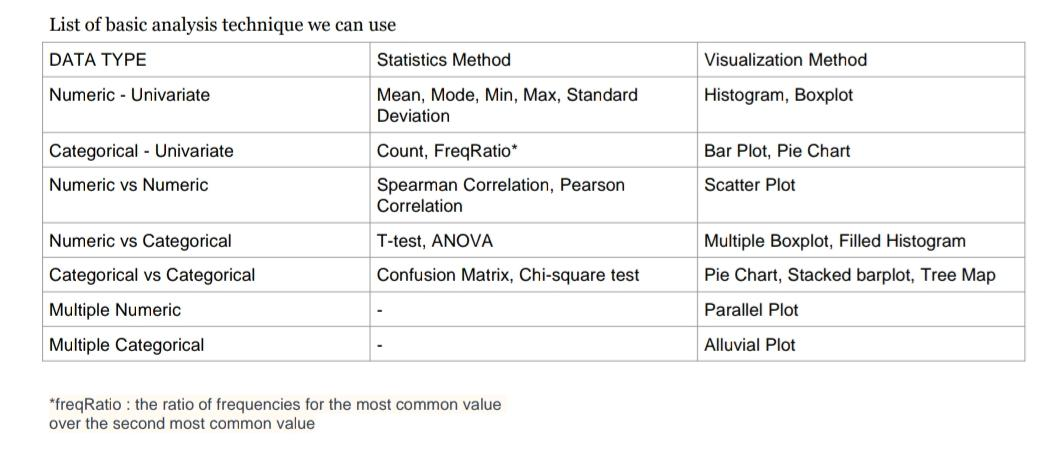

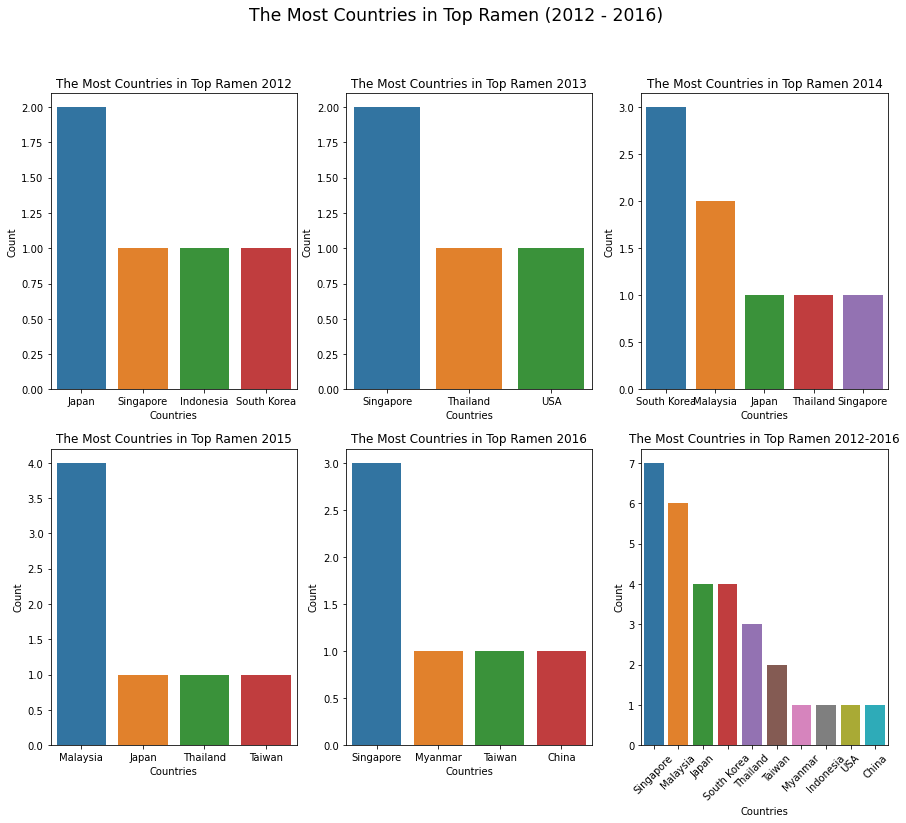

In [43]:
### Density Plot - Faceting

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (15,12), 
                                                       sharey = False,
                                                      sharex = False)

# Draw Plot
splot1 = sns.countplot(data=df_top_ten_2012, x='Country',order=df_top_ten_2012['Country'].value_counts().index, ax=ax1)
splot2 = sns.countplot(data=df_top_ten_2013, x='Country',order=df_top_ten_2013['Country'].value_counts().index, ax=ax2)
splot3 = sns.countplot(data=df_top_ten_2014, x='Country',order=df_top_ten_2014['Country'].value_counts().index, ax=ax3)
splot4 = sns.countplot(data=df_top_ten_2015, x='Country',order=df_top_ten_2015['Country'].value_counts().index, ax=ax4)
splot5 = sns.countplot(data=df_top_ten_2016, x='Country',order=df_top_ten_2016['Country'].value_counts().index, ax=ax5)
splot6 = sns.countplot(data=df_top_ten, x='Country',order=df_top_ten['Country'].value_counts().index, ax=ax6)
plt.xticks(rotation=45)


# Set axis label
ax1.set_ylabel('Count',fontsize=10)
ax2.set_ylabel('Count',fontsize=10)
ax3.set_ylabel('Count',fontsize=10)
ax4.set_ylabel('Count',fontsize=10)
ax5.set_ylabel('Count',fontsize=10)
ax6.set_ylabel('Count',fontsize=10)


ax1.set_xlabel('Countries',fontsize=10)
ax2.set_xlabel('Countries',fontsize=10)
ax3.set_xlabel('Countries',fontsize=10)
ax4.set_xlabel('Countries',fontsize=10)
ax5.set_xlabel('Countries',fontsize=10)
ax6.set_xlabel('Countries',fontsize=10)


# Set Title for each plots
ax1.set_title('The Most Countries in Top Ramen 2012')
ax2.set_title('The Most Countries in Top Ramen 2013')
ax3.set_title('The Most Countries in Top Ramen 2014')
ax4.set_title('The Most Countries in Top Ramen 2015')
ax5.set_title('The Most Countries in Top Ramen 2016')
ax6.set_title('The Most Countries in Top Ramen 2012-2016')

fig.suptitle('The Most Countries in Top Ramen (2012 - 2016)', fontsize = 'xx-large')


plt.show()

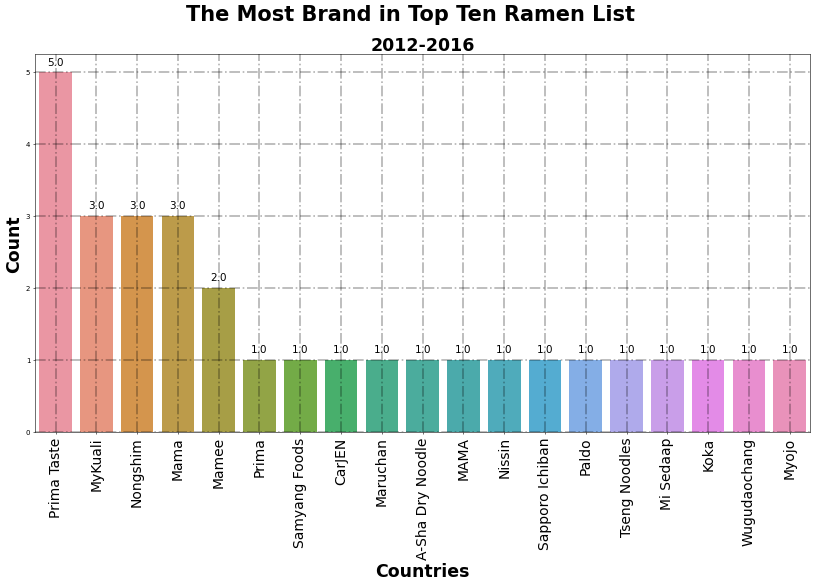

In [44]:
plt.figure(figsize=(20,10),dpi=50)
splot = sns.countplot(data=df_top_ten, x='Brand',order=df_top_ten['Brand'].value_counts().index)
plt.suptitle('The Most Brand in Top Ten Ramen List',weight='bold',fontsize=30)
plt.title('2012-2016',weight='bold',fontsize=25) 
plt.xlabel('Countries',weight='bold', fontsize=25)
plt.ylabel('Count',weight='bold', fontsize=25)
plt.xticks(rotation=90, fontsize=20)
plt.grid(color='black', 
         alpha=0.3, # mengatur opacity garis
         linestyle='-.', # mengatur 'tekstur' garis
         linewidth=2.4) # mengatur ketebalan garisnes

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 15), 
                   textcoords = 'offset points')
plt.show()

In [45]:
style=df_top_ten.Style.value_counts()
style

Pack    27
Tray     3
Name: Style, dtype: int64

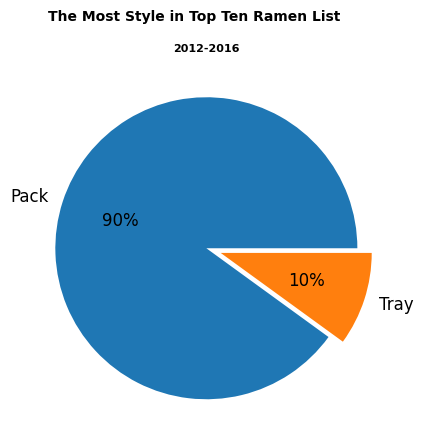

In [46]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(style[0:2],pctdistance=0.6,autopct="%2.02g%%",radius=1,labels=['Pack','Tray'],
        explode=[0,0.1],
       textprops={'fontsize': 12})

plt.suptitle('The Most Style in Top Ten Ramen List',weight='bold',fontsize=10)
plt.title('2012-2016',weight='bold',fontsize=8) 




plt.show()

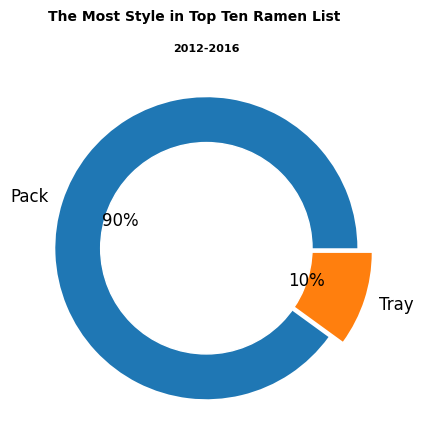

In [47]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(style[0:2],pctdistance=0.6,autopct="%2.02g%%",radius=1,labels=['Pack','Tray'],
        explode=[0,0.1],
       textprops={'fontsize': 12})

plt.suptitle('The Most Style in Top Ten Ramen List',weight='bold',fontsize=10)
plt.title('2012-2016',weight='bold',fontsize=8) 

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.show()

In [74]:
custom_aggregation = {}
custom_aggregation["Scores"] = "mean"
df3 = df_top_ten.groupby("Country").agg(custom_aggregation)

df3.columns = ["Scores"]
df3['Country'] = df3.index
df3['Scores'] = df3['Scores'].round(decimals=1)

fig = px.bar(df3, x='Country', y="Scores", color="Country", title="The Best Country on Top Ten Ramen Rating")

fig.show()

Actually the average score cannot be used as a reference to determine The best Country in top Ten Ramen Rating

## Drop Top Ten

In [48]:
df1 =df.drop(['Top Ten'],axis=1)

In [49]:
df1.head()

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1969
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    1953 non-null   object 
 1   Variety  1953 non-null   object 
 2   Style    1952 non-null   object 
 3   Country  1953 non-null   object 
 4   Stars    1953 non-null   float64
dtypes: float64(1), object(4)
memory usage: 92.2+ KB


# Missing Value Handling

In [51]:
df1.isna().sum()

Brand      14
Variety    14
Style      15
Country    14
Stars      14
dtype: int64

In [52]:
df1 = df1.dropna(axis=0)

In [53]:
df1.isna().sum()

Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1969
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    1952 non-null   object 
 1   Variety  1952 non-null   object 
 2   Style    1952 non-null   object 
 3   Country  1952 non-null   object 
 4   Stars    1952 non-null   float64
dtypes: float64(1), object(4)
memory usage: 91.5+ KB


In [55]:
df1.describe(include='all')

,Brand,Variety,Style,Country,Stars
count,1952,1952,1952,1952,1952.000000
unique,317,1864,7,34,NaN
top,Nissin,Miso Ramen,Pack,Japan,NaN
freq,309,5,1144,281,NaN
mean,NaN,NaN,NaN,NaN,3.733056
std,NaN,NaN,NaN,NaN,1.014920
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,3.250000
50%,NaN,NaN,NaN,NaN,3.750000
75%,NaN,NaN,NaN,NaN,4.500000


# Feature Variety

In [56]:
ramen_names = df['Variety']
ramen_names

0                               T's Restaurant Tantanmen 
1       Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...
2                           Cup Noodles Chicken Vegetable
3                           GGE Ramen Snack Tomato Flavor
4                                         Singapore Curry
                              ...                        
1965                                                  NaN
1966                       Oriental Style Instant Noodles
1967                                       Tom Yum Shrimp
1968                                 Tom Yum Chili Flavor
1969                                           Miso Ramen
Name: Variety, Length: 1967, dtype: object

In [76]:
# contoh aja ya
ps.stem('Boring')

'bore'

In [60]:
ps = PorterStemmer()

def process_name(name):
    new_name = name.lower() # Make name lowercase
    new_name = re.sub(r'[^a-z0-9\s]', '', new_name) # Remove punctuation
    new_name = re.sub(r'[0-9]+', 'number', new_name) # Change numerical words to "number"
    new_name = new_name.split(" ") # Make string into a list of words
    new_name = list(map(lambda x: ps.stem(x), new_name)) # Stem each word
    new_name = list(map(lambda x: x.strip(), new_name)) # Removing leading and trailing whitespace
    for i in range(len(new_name)):
        if new_name[i] == 'flavour':
            new_name[i] = 'flavor'
    if '' in new_name:
        new_name.remove('') # Remove the empty string if it exists
    return new_name

In [61]:
df.Variety=df.Variety.astype(str)

In [62]:
ramen_names = ramen_names.apply(process_name)
ramen_names

0                                [ts, restaur, tantanmen]
1       [noodl, spici, hot, sesam, spici, hot, sesam, ...
2                            [cup, noodl, chicken, veget]
3                     [gge, ramen, snack, tomato, flavor]
4                                       [singapor, curri]
                              ...                        
1965                                                [nan]
1966                      [orient, style, instant, noodl]
1967                                   [tom, yum, shrimp]
1968                            [tom, yum, chili, flavor]
1969                                        [miso, ramen]
Name: Variety, Length: 1967, dtype: object

In [63]:
# Getting the number of unique words in our list of ramen names
vocabulary = set()

for name in ramen_names:
    for word in name:
        if word not in vocabulary:
            vocabulary.add(word)

vocab_length = len(vocabulary)


# Getting the maximum length of a single ramen name
max_seq_length = max(ramen_names.apply(lambda x: len(x)))


# Print results
print("       Vocab length:", vocab_length)
print("Max sequence length:", max_seq_length)

       Vocab length: 1224
Max sequence length: 13


In [64]:
tokenizer = Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(ramen_names)

word_index = tokenizer.word_index

In [ ]:
word_index

{'noodl': 1,
 'flavor': 2,
 'instant': 3,
 'ramen': 4,
 'chicken': 5,
 'spici': 6,
 'soup': 7,
 'beef': 8,
 'cup': 9,
 'with': 10,
 'sauc': 11,
 'curri': 12,
 'rice': 13,
 'tom': 14,
 'hot': 15,
 'shrimp': 16,
 'artifici': 17,
 'mi': 18,
 'seafood': 19,
 'style': 20,
 'pork': 21,
 'yum': 22,
 'bowl': 23,
 'penang': 24,
 'goreng': 25,
 'veget': 26,
 'udon': 27,
 'tonkotsu': 28,
 'sesam': 29,
 'orient': 30,
 'vermicelli': 31,
 'dema': 32,
 'black': 33,
 'yakisoba': 34,
 'number': 35,
 'mushroom': 36,
 'ramyun': 37,
 'fri': 38,
 'miso': 39,
 'shoyu': 40,
 'japanes': 41,
 'dri': 42,
 'a': 43,
 'vegetarian': 44,
 'soy': 45,
 'creami': 46,
 'laksa': 47,
 'sour': 48,
 'white': 49,
 'thai': 50,
 'big': 51,
 'chow': 52,
 'mein': 53,
 'kimchi': 54,
 'sabor': 55,
 'tast': 56,
 'tomato': 57,
 'king': 58,
 'snack': 59,
 'super': 60,
 'crab': 61,
 'oil': 62,
 'rasa': 63,
 'origin': 64,
 'yam': 65,
 'onion': 66,
 'new': 67,
 'pepper': 68,
 'stew': 69,
 'chilli': 70,
 'korean': 71,
 'base': 72,
 'sopa

In [65]:
sequences = tokenizer.texts_to_sequences(ramen_names)


name_features = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

name_features

array([[442, 345, 272, ...,   0,   0,   0],
       [  1,   6,  15, ...,   0,   0,   0],
       [  9,   1,   5, ...,   0,   0,   0],
       ...,
       [ 14,  22,  16, ...,   0,   0,   0],
       [ 14,  22,  77, ...,   0,   0,   0],
       [ 39,   4,   0, ...,   0,   0,   0]], dtype=int32)

# Data Visualisation

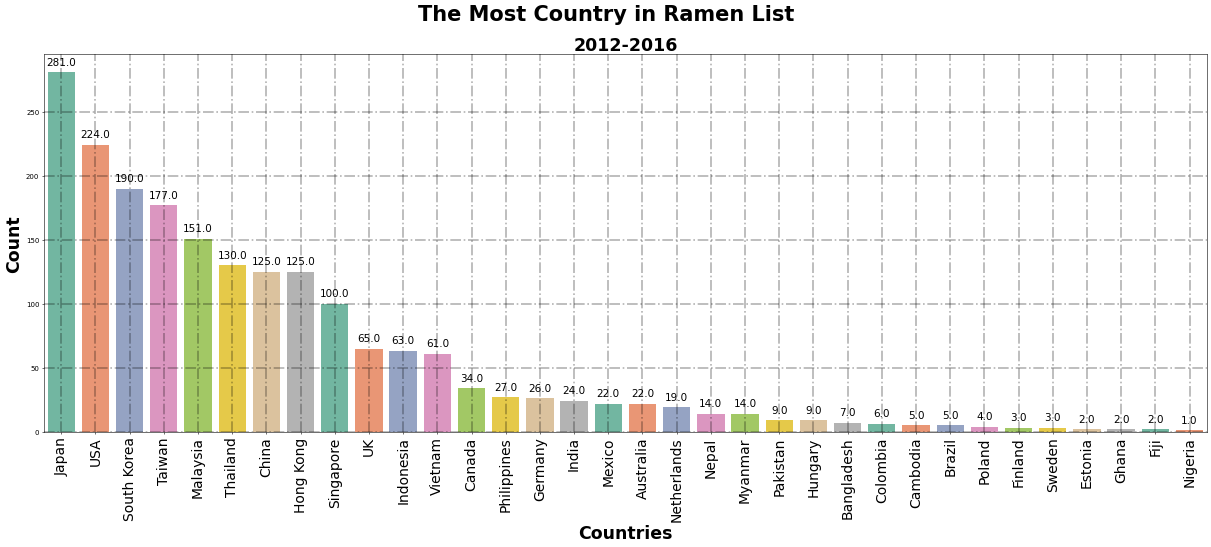

In [66]:
plt.figure(figsize=(30,10),dpi=50)
splot = sns.countplot(data=df1, x='Country',order=df1['Country'].value_counts().index, palette = 'Set2')
plt.suptitle('The Most Country in Ramen List',weight='bold',fontsize=30)
plt.title('2012-2016',weight='bold',fontsize=25) 
plt.xlabel('Countries',weight='bold', fontsize=25)
plt.ylabel('Count',weight='bold', fontsize=25)
plt.xticks(rotation=90, fontsize=20)
plt.grid(color='black', 
         alpha=0.3, # mengatur opacity garis
         linestyle='-.', # mengatur 'tekstur' garis
         linewidth=2.4) # mengatur ketebalan garisnes

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 15), 
                   textcoords = 'offset points')
plt.show()

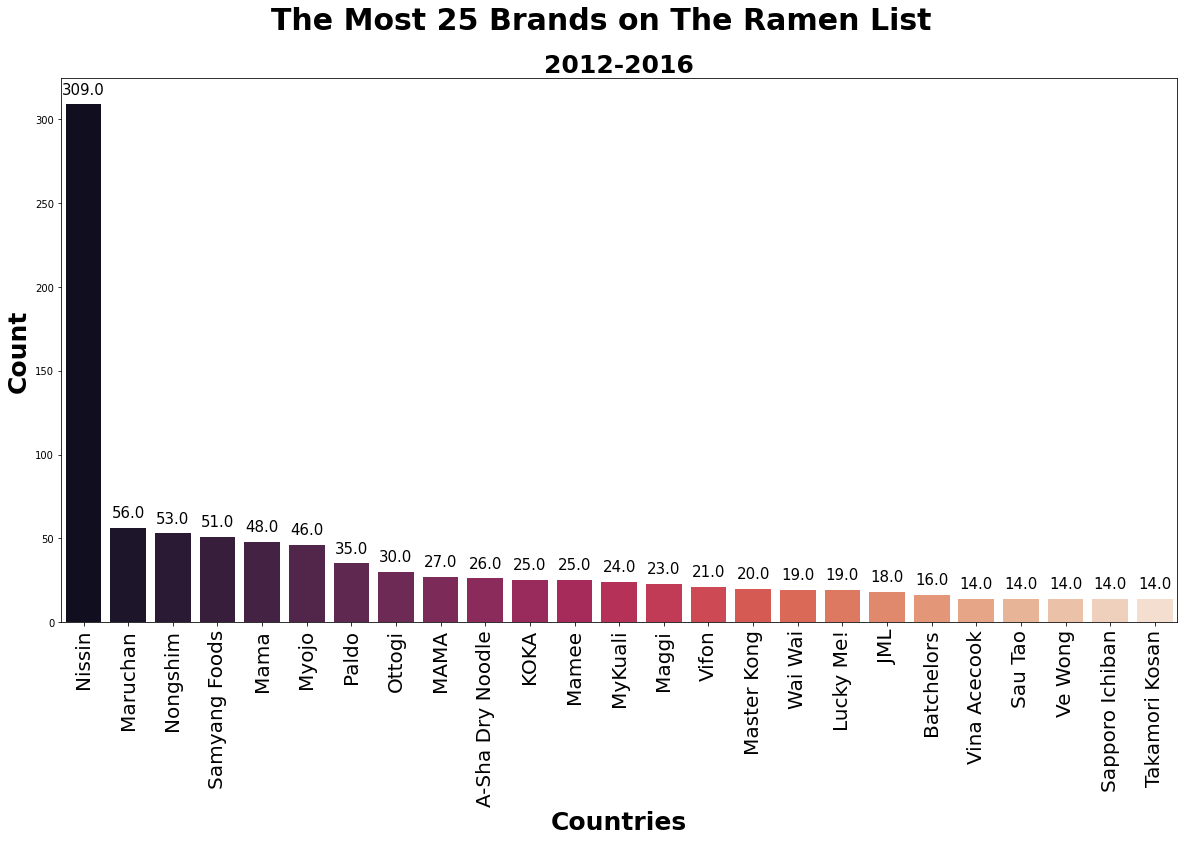

In [101]:
## There are lots of brands, get 25 the most brand
plt.figure(figsize=(20,10))
splot = sns.countplot(data=df1, x='Brand', order = df1['Brand'].value_counts().iloc[:25].index, palette='rocket')
plt.suptitle('The Most 25 Brands on The Ramen List',weight='bold',fontsize=30)
plt.title('2012-2016',weight='bold',fontsize=25) 
plt.xlabel('Countries',weight='bold', fontsize=25)
plt.ylabel('Count',weight='bold', fontsize=25)
plt.xticks(rotation=90, fontsize=20)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 15), 
                   textcoords = 'offset points')
plt.show()

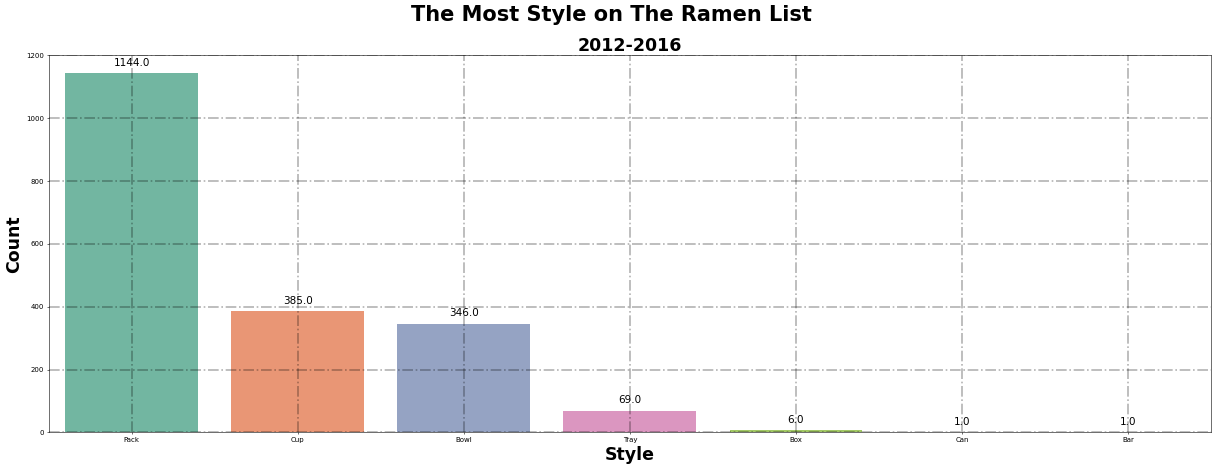

In [100]:
plt.figure(figsize=(30,10),dpi=50)
splot = sns.countplot(data=df1, x='Style',order=df1['Style'].value_counts().index, palette = 'Set2')
plt.suptitle('The Most Style on The Ramen List',weight='bold',fontsize=30)
plt.title('2012-2016',weight='bold',fontsize=25) 
plt.xlabel('Style',weight='bold', fontsize=25)
plt.ylabel('Count',weight='bold', fontsize=25)
plt.grid(color='black', 
         alpha=0.3, # mengatur opacity garis
         linestyle='-.', # mengatur 'tekstur' garis
         linewidth=2.4) # mengatur ketebalan garisnes

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 15), 
                   textcoords = 'offset points')
plt.show()

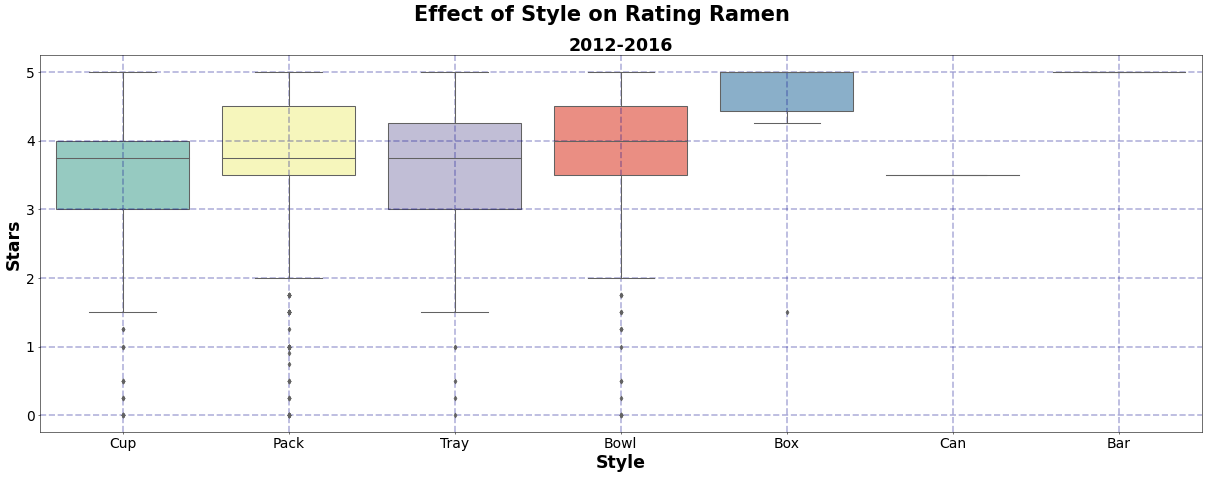

In [68]:

plt.figure(figsize=(30,10),dpi=50)
sns.boxplot(x="Style", y="Stars", data=df1, palette="Set3")
#sns.swarmplot(x="Style", y="Stars", data=df1, color=".25")  # to show the datapoints on top of the boxes
plt.suptitle('Effect of Style on Rating Ramen',weight='bold',fontsize=30)
plt.title('2012-2016',weight='bold',fontsize=25) 
plt.xlabel('Style',weight='bold', fontsize=25)
plt.ylabel('Stars',weight='bold', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid(color='darkblue', 
         alpha=0.3, # mengatur opacity garis
         linestyle='--', # mengatur 'tekstur' garis
         linewidth=2.4) # mengatur ketebalan garisnes
plt.show()

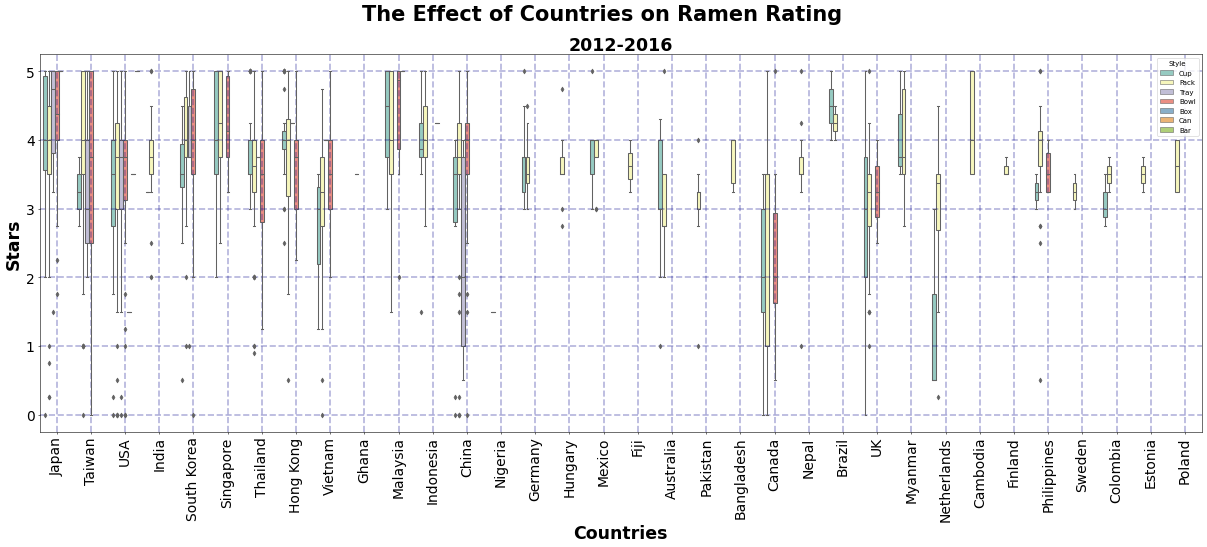

In [69]:
plt.figure(figsize=(30,10),dpi=50)
sns.boxplot(x="Country", y="Stars", hue ='Style', data=df1, palette="Set3")
#sns.swarmplot(x="Style", y="Stars", data=df1, color=".25")  # to show the datapoints on top of the boxes
plt.suptitle('The Effect of Countries on Ramen Rating',weight='bold',fontsize=30)
plt.title('2012-2016',weight='bold',fontsize=25) 
plt.xlabel('Countries',weight='bold', fontsize=25)
plt.ylabel('Stars',weight='bold', fontsize=25)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

plt.grid(color='darkblue', 
         alpha=0.3, # mengatur opacity garis
         linestyle='--', # mengatur 'tekstur' garis
         linewidth=2.4) # mengatur ketebalan garisnes
plt.show()

In [ ]:
the_best_brand = df1[ df["Stars"] >= 4.5]

In [103]:
the_best_brand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 5 to 1958
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    496 non-null    object 
 1   Variety  496 non-null    object 
 2   Style    496 non-null    object 
 3   Country  496 non-null    object 
 4   Stars    496 non-null    float64
dtypes: float64(1), object(4)
memory usage: 23.2+ KB


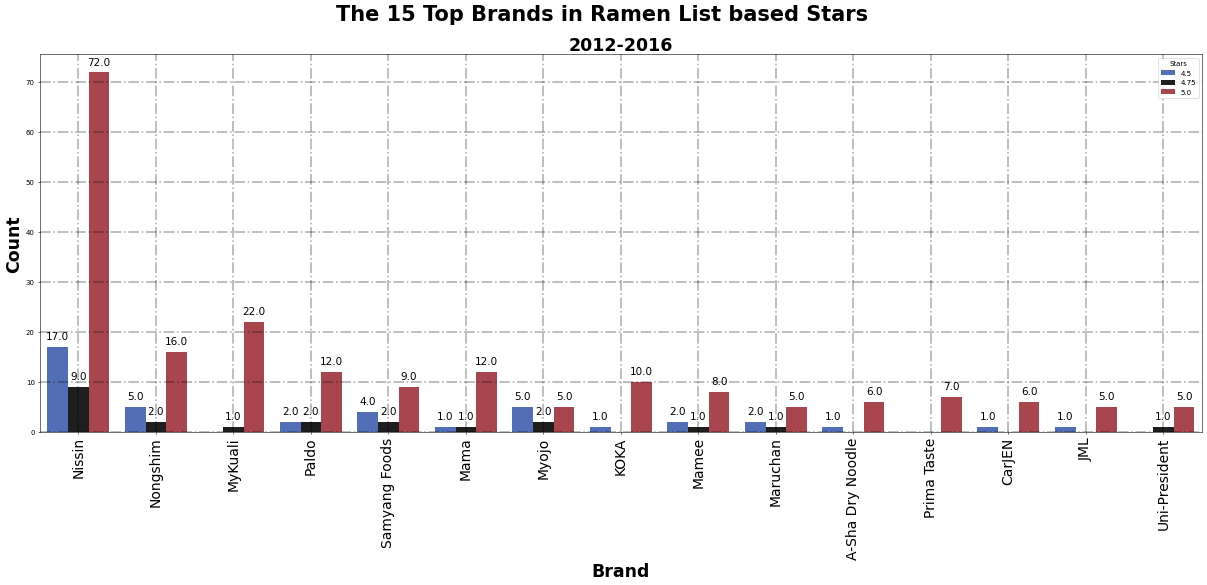

In [116]:
plt.figure(figsize=(30,10),dpi=50)
splot = sns.countplot(data=the_best_brand, x='Brand', hue='Stars', order = the_best_brand['Brand'].value_counts().iloc[:15].index, palette='icefire')
plt.suptitle('The 15 Top Brands in Ramen List based Stars',weight='bold',fontsize=30)
plt.title('2012-2016',weight='bold',fontsize=25) 
plt.xlabel('Brand',weight='bold', fontsize=25)
plt.ylabel('Count',weight='bold', fontsize=25)
plt.xticks(rotation=90, fontsize=20)
plt.grid(color='black', 
         alpha=0.3, # mengatur opacity garis
         linestyle='-.', # mengatur 'tekstur' garis
         linewidth=2.4) # mengatur ketebalan garisnes

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 15), 
                   textcoords = 'offset points')
plt.show()

In [ ]:
## There are lots of brands (147) with 4.5 star and above, so I will display only the first 10 companies with most stars
plt.figure(figsize=(20,10))
ax = sns.countplot(data=the_best_brand, x='Brand', hue='Stars', order = the_best_brand['Brand'].value_counts().iloc[:15].index)
plt.title('Most Successful Ten Ramen Brands based on Stars',weight='bold',fontsize=16)
plt.xlabel('Brand Name',weight='bold')
plt.ylabel('Count',weight='bold')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

In [70]:
custom_aggregation = {}
custom_aggregation["Stars"] = "mean"
df2 = df1.groupby("Country").agg(custom_aggregation)

df2.columns = ["Stars"]
df2['Country'] = df2.index
df2['Stars'] = df2['Stars'].round(decimals=1)

fig = px.bar(df2, x='Country', y="Stars", color="Country", title="The Best Country on Ramen Rating")

fig.show()

- K means Clustering

??